1. Data Loading and Libraries Setup

In [31]:
# Import libraries
import pandas as pd
import numpy as np

# Upload and load dataset
df = pd.read_csv('/content/Fatal_Collisions.csv')

# Inspect dataset
print(df.head())

   ACCNUM  YEAR                    DATE  TIME        STREET1        STREET2  \
0  882024  2006  2006/01/07 05:00:00+00  2325  STEELES AVE E  NINTH LINE ST   
1  882497  2006  2006/01/08 05:00:00+00  1828  ISLINGTON AVE    GOLFDOWN DR   
2  882174  2006  2006/01/09 05:00:00+00  1435     KENNEDY RD  GLAMORGAN AVE   
3  882501  2006  2006/01/11 05:00:00+00  1120     BARTLEY DR     JINNAH CRT   
4  886230  2006  2006/01/21 05:00:00+00  1829    MIDLAND AVE    GOODLAND GT   

       ROAD_CLASS        DISTRICT  WARDNUM   LATITUDE  ...  \
0  Minor Arterial     Scarborough       25  43.842745  ...   
1  Major Arterial  Etobicoke York        1  43.721445  ...   
2  Major Arterial     Scarborough       21  43.769445  ...   
3       Collector      North York       16  43.722045  ...   
4  Major Arterial     Scarborough     2223  43.779345  ...   

                 ACCLOC              TRAFFCTL VISIBILITY     LIGHT RDSFCOND  \
0  Intersection Related            No Control      Clear      Dark      W

2. Data Exploration and Preprocessing

In [32]:
# Print all columns to verify the existence of the target column
print("Available columns in DataFrame:")
print(df.columns)

Available columns in DataFrame:
Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY'],
      dtype='object')


In [33]:
#Basic Data Exploration
# Basic Info
print(df.info())

# Basic statistical description of numerical columns
print(df.describe())

# Checking the number of missing values for each column
missing_values = df.isnull().sum()
print(missing_values[missing_values > 0])


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 931 entries, 0 to 930
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   ACCNUM      931 non-null    object 
 1   YEAR        931 non-null    int64  
 2   DATE        931 non-null    object 
 3   TIME        931 non-null    int64  
 4   STREET1     931 non-null    object 
 5   STREET2     931 non-null    object 
 6   ROAD_CLASS  931 non-null    object 
 7   DISTRICT    931 non-null    object 
 8   WARDNUM     931 non-null    int64  
 9   LATITUDE    931 non-null    float64
 10  LONGITUDE   931 non-null    float64
 11  LOCCOORD    931 non-null    object 
 12  ACCLOC      931 non-null    object 
 13  TRAFFCTL    931 non-null    object 
 14  VISIBILITY  931 non-null    object 
 15  LIGHT       931 non-null    object 
 16  RDSFCOND    931 non-null    object 
 17  ACCLASS     931 non-null    object 
 18  IMPACTYPE   931 non-null    object 
 19  INVTYPE     931 non-null    o

In [34]:
# Assuming 'Date' is a column in the DataFrame 'df'
unique_dates = df['DATE'].unique()
print(unique_dates)


['2006/01/07 05:00:00+00' '2006/01/08 05:00:00+00'
 '2006/01/09 05:00:00+00' '2006/01/11 05:00:00+00'
 '2006/01/21 05:00:00+00' '2006/01/24 05:00:00+00'
 '2006/01/29 05:00:00+00' '2006/02/15 05:00:00+00'
 '2006/02/20 05:00:00+00' '2006/02/27 05:00:00+00'
 '2006/03/06 05:00:00+00' '2006/03/08 05:00:00+00'
 '2006/03/11 05:00:00+00' '2006/03/12 05:00:00+00'
 '2006/03/15 05:00:00+00' '2006/04/15 04:00:00+00'
 '2006/04/18 04:00:00+00' '2006/04/20 04:00:00+00'
 '2006/04/29 04:00:00+00' '2006/04/30 04:00:00+00'
 '2006/05/03 04:00:00+00' '2006/05/17 04:00:00+00'
 '2006/05/23 04:00:00+00' '2006/05/30 04:00:00+00'
 '2006/06/02 04:00:00+00' '2006/06/05 04:00:00+00'
 '2006/06/10 04:00:00+00' '2006/06/19 04:00:00+00'
 '2006/06/20 04:00:00+00' '2006/07/19 04:00:00+00'
 '2006/07/23 04:00:00+00' '2006/07/28 04:00:00+00'
 '2006/07/30 04:00:00+00' '2006/08/01 04:00:00+00'
 '2006/08/03 04:00:00+00' '2006/08/18 04:00:00+00'
 '2006/08/19 04:00:00+00' '2006/08/25 04:00:00+00'
 '2006/08/27 04:00:00+00' '2006

In [35]:
import pandas as pd
import numpy as np

# Assuming df is the DataFrame already loaded

# Step 1: Drop Rows with Missing Target ('INJURY') Values
# Assuming 'INJURY' is our target, we drop rows with missing target values
if 'INJURY' in df.columns:
    df = df.dropna(subset=['INJURY'])

# Step 2: Impute Missing Values for Numerical Columns with Median
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
df[numerical_cols] = df[numerical_cols].fillna(df[numerical_cols].median())

# Step 3: Impute Missing Values for Categorical Columns with Mode
categorical_cols = df.select_dtypes(include=['object']).columns
df[categorical_cols] = df[categorical_cols].apply(lambda col: col.fillna(col.mode()[0]) if col.isnull().any() else col, axis=0)

# Step 4: Verify Missing Values Again
missing_values = df.isnull().sum()
print("Columns with remaining missing values:")
print(missing_values[missing_values > 0])




Columns with remaining missing values:
Series([], dtype: int64)


In [36]:
# Print all columns to verify the existence of the target column
print("Available columns in DataFrame:")
print(df.columns)

Available columns in DataFrame:
Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY'],
      dtype='object')


In [37]:
# Impute numerical columns with median and verify
numerical_cols = df.select_dtypes(include=['float64', 'int64']).columns
for col in numerical_cols:
    df[col] = df[col].fillna(df[col].median())

# Verify that numerical columns have no missing values
print("Missing values in numerical columns after imputation:")
print(df[numerical_cols].isnull().sum())

# Impute categorical columns with mode and verify
categorical_cols = df.select_dtypes(include=['object']).columns
for col in categorical_cols:
    df[col] = df[col].fillna(df[col].mode()[0])

# Verify that categorical columns have no missing values
print("Missing values in categorical columns after imputation:")
print(df[categorical_cols].isnull().sum())


Missing values in numerical columns after imputation:
YEAR         0
TIME         0
WARDNUM      0
LATITUDE     0
LONGITUDE    0
INVAGE       0
dtype: int64
Missing values in categorical columns after imputation:
ACCNUM        0
DATE          0
STREET1       0
STREET2       0
ROAD_CLASS    0
DISTRICT      0
LOCCOORD      0
ACCLOC        0
TRAFFCTL      0
VISIBILITY    0
LIGHT         0
RDSFCOND      0
ACCLASS       0
IMPACTYPE     0
INVTYPE       0
INJURY        0
dtype: int64


3. Exploratory Data Analysis (EDA)

In [38]:
# Print all columns to verify the existence of the target column
print("Available columns in DataFrame:")
print(df.columns)

Available columns in DataFrame:
Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY'],
      dtype='object')


Distribution of Numerical Features

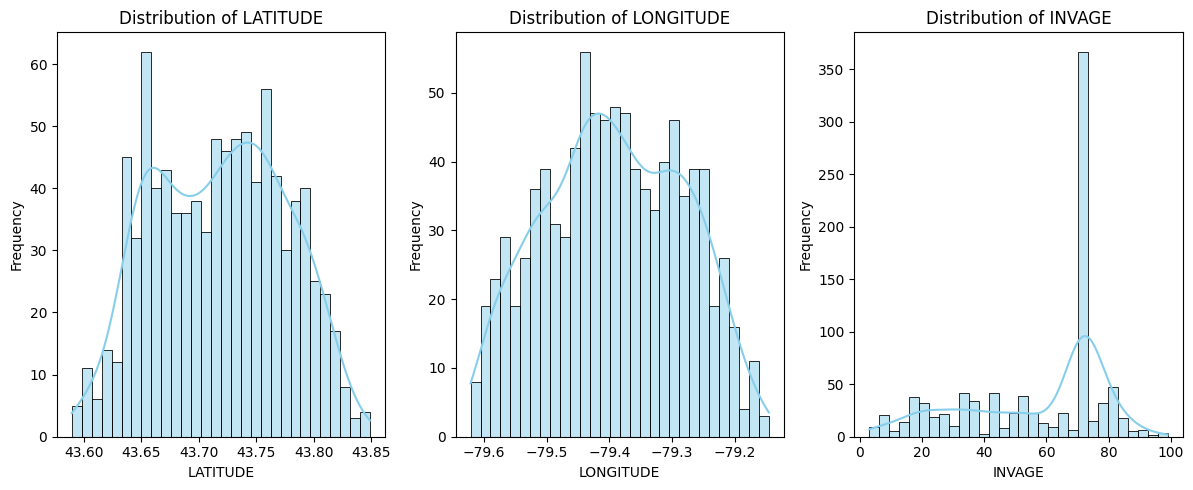

In [39]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Plot Distribution of Numerical Features without Loop
plt.figure(figsize=(20, 5))

# Plot LATITUDE
if 'LATITUDE' in df.columns:
    plt.subplot(1, 5, 1)
    sns.histplot(df['LATITUDE'], kde=True, bins=30, color='skyblue')
    plt.title('Distribution of LATITUDE')
    plt.xlabel('LATITUDE')
    plt.ylabel('Frequency')

# Plot LONGITUDE
if 'LONGITUDE' in df.columns:
    plt.subplot(1, 5, 2)
    sns.histplot(df['LONGITUDE'], kde=True, bins=30, color='skyblue')
    plt.title('Distribution of LONGITUDE')
    plt.xlabel('LONGITUDE')
    plt.ylabel('Frequency')

# Plot INVAGE
if 'INVAGE' in df.columns:
    plt.subplot(1, 5, 3)
    sns.histplot(df['INVAGE'], kde=True, bins=30, color='skyblue')
    plt.title('Distribution of INVAGE')
    plt.xlabel('INVAGE')
    plt.ylabel('Frequency')

# Plot x
if 'x' in df.columns:
    plt.subplot(1, 5, 4)
    sns.histplot(df['x'], kde=True, bins=30, color='skyblue')
    plt.title('Distribution of x')
    plt.xlabel('x')
    plt.ylabel('Frequency')

# Plot y
if 'y' in df.columns:
    plt.subplot(1, 5, 5)
    sns.histplot(df['y'], kde=True, bins=30, color='skyblue')
    plt.title('Distribution of y')
    plt.xlabel('y')
    plt.ylabel('Frequency')

plt.tight_layout()
plt.show()



Distribution of Categorical Features

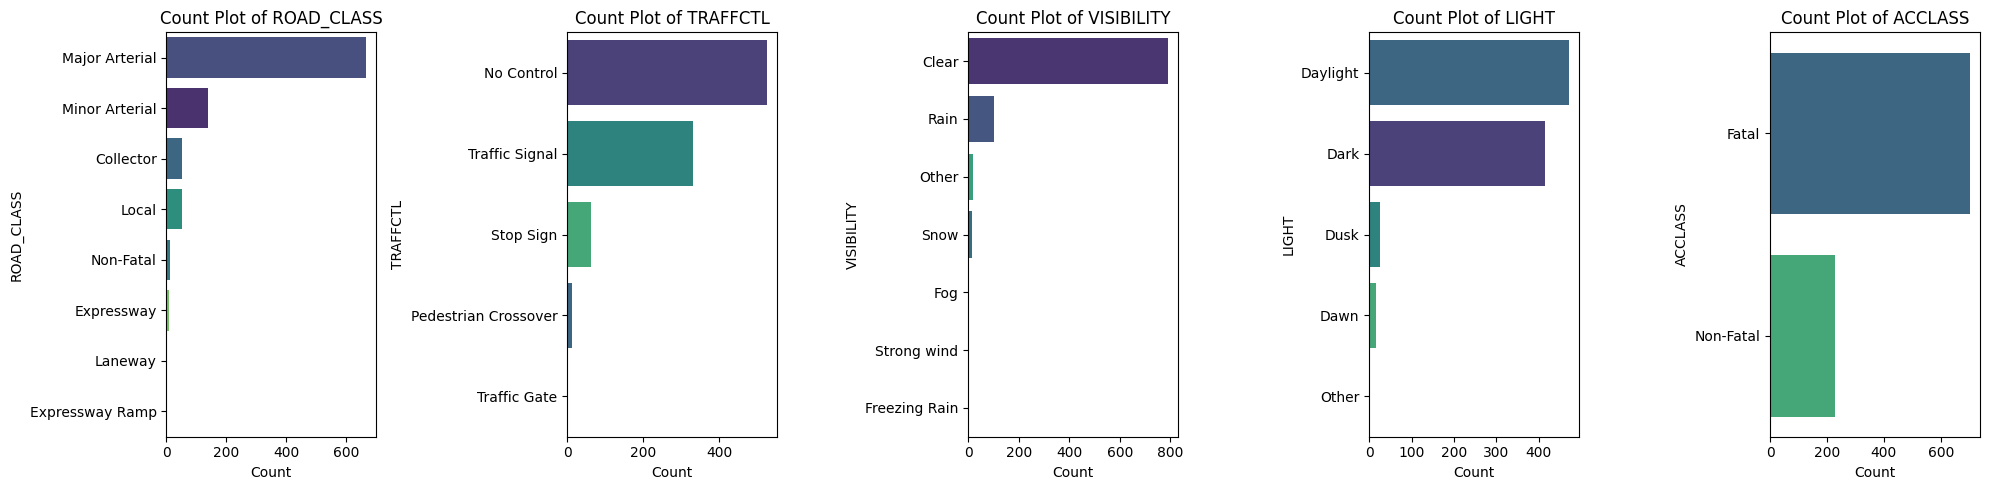

In [40]:
# Plot Distribution of Categorical Features without Loop
plt.figure(figsize=(20, 5))

# Plot ROAD_CLASS
if 'ROAD_CLASS' in df.columns:
    plt.subplot(1, 5, 1)
    sns.countplot(y='ROAD_CLASS', data=df, hue='ROAD_CLASS', order=df['ROAD_CLASS'].value_counts().index, legend=False, palette='viridis')
    plt.title('Count Plot of ROAD_CLASS')
    plt.xlabel('Count')
    plt.ylabel('ROAD_CLASS')

# Plot TRAFFCTL
if 'TRAFFCTL' in df.columns:
    plt.subplot(1, 5, 2)
    sns.countplot(y='TRAFFCTL', data=df, hue='TRAFFCTL', order=df['TRAFFCTL'].value_counts().index, legend=False, palette='viridis')
    plt.title('Count Plot of TRAFFCTL')
    plt.xlabel('Count')
    plt.ylabel('TRAFFCTL')

# Plot VISIBILITY
if 'VISIBILITY' in df.columns:
    plt.subplot(1, 5, 3)
    sns.countplot(y='VISIBILITY', data=df, hue='VISIBILITY', order=df['VISIBILITY'].value_counts().index, legend=False, palette='viridis')
    plt.title('Count Plot of VISIBILITY')
    plt.xlabel('Count')
    plt.ylabel('VISIBILITY')

# Plot LIGHT
if 'LIGHT' in df.columns:
    plt.subplot(1, 5, 4)
    sns.countplot(y='LIGHT', data=df, hue='LIGHT', order=df['LIGHT'].value_counts().index, legend=False, palette='viridis')
    plt.title('Count Plot of LIGHT')
    plt.xlabel('Count')
    plt.ylabel('LIGHT')

# Plot ACCLASS
if 'ACCLASS' in df.columns:
    plt.subplot(1, 5, 5)
    sns.countplot(y='ACCLASS', data=df, hue='ACCLASS', order=df['ACCLASS'].value_counts().index, legend=False, palette='viridis')
    plt.title('Count Plot of ACCLASS')
    plt.xlabel('Count')
    plt.ylabel('ACCLASS')

plt.tight_layout()
plt.show()

<ipython-input-41-15927c241310>:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='INJURY', data=df, palette='viridis')


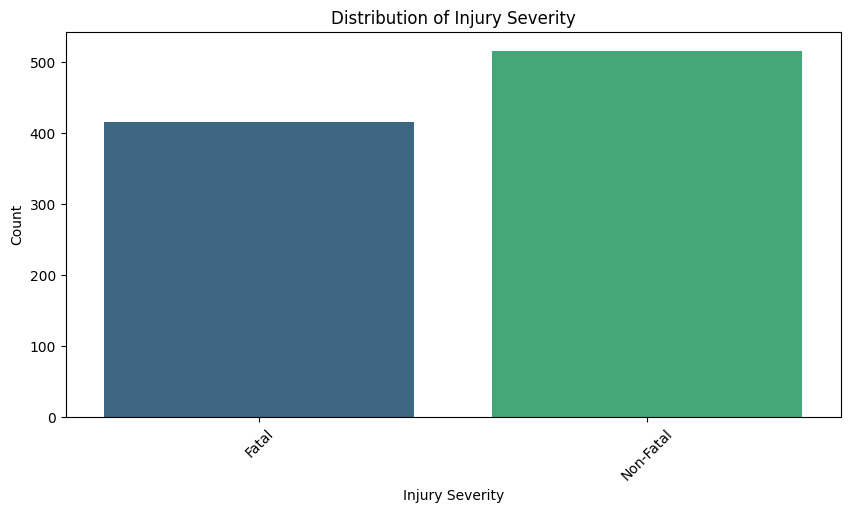

In [41]:
# Plotting the distribution of Injury Severity
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(10, 5))
sns.countplot(x='INJURY', data=df, palette='viridis')
plt.title('Distribution of Injury Severity')
plt.xlabel('Injury Severity')
plt.ylabel('Count')
plt.xticks(rotation=45)
plt.show()


In [42]:
print("Available columns in DataFrame:")
print(df.columns)


Available columns in DataFrame:
Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY'],
      dtype='object')


Correlation Analysis

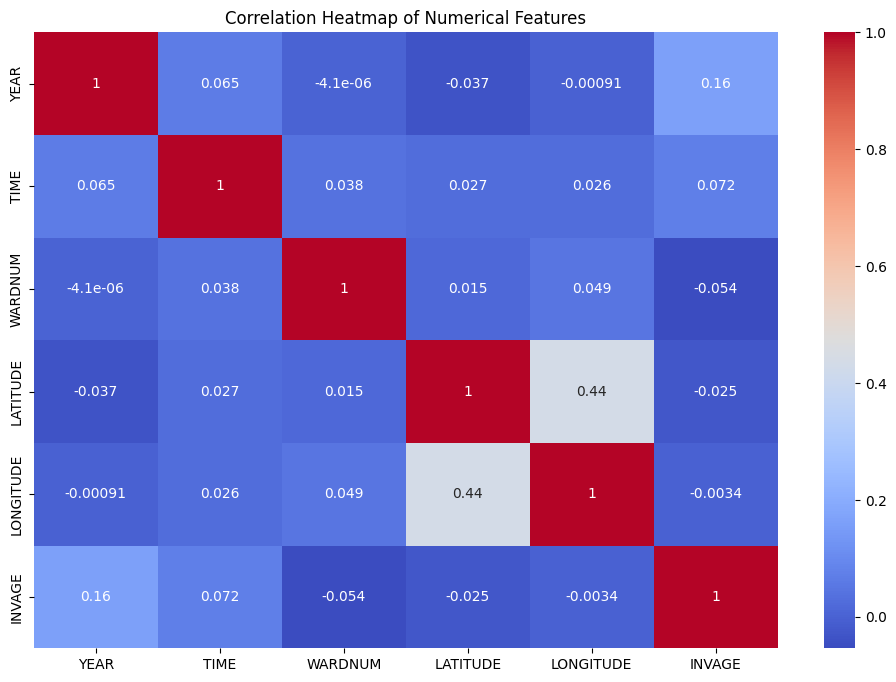

In [43]:
import matplotlib.pyplot as plt
import seaborn as sns

# Select only numerical features from the DataFrame
numerical_features = df.select_dtypes(include=['number'])

# Correlation heatmap of numerical features
plt.figure(figsize=(12, 8))
sns.heatmap(numerical_features.corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Heatmap of Numerical Features')
plt.show()


In [44]:
print("Available columns in DataFrame:")
print(df.columns)


Available columns in DataFrame:
Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY'],
      dtype='object')


Spatial and temporal Analysis

In [45]:
import folium
from folium.plugins import HeatMap

# Create a base map of Toronto
toronto_map = folium.Map(location=[df['LATITUDE'].mean(), df['LONGITUDE'].mean()], zoom_start=11)

# Add accident locations as points on the map
for _, row in df.iterrows():
    folium.CircleMarker(
        location=[row['LATITUDE'], row['LONGITUDE']],
        radius=3,
        color='red',
        fill=True,
        fill_color='red',
        fill_opacity=0.4
    ).add_to(toronto_map)

# Display the map
toronto_map


In [46]:
print("Available columns in DataFrame:")
print(df.columns)


Available columns in DataFrame:
Index(['ACCNUM', 'YEAR', 'DATE', 'TIME', 'STREET1', 'STREET2', 'ROAD_CLASS',
       'DISTRICT', 'WARDNUM', 'LATITUDE', 'LONGITUDE', 'LOCCOORD', 'ACCLOC',
       'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE',
       'INVTYPE', 'INVAGE', 'INJURY'],
      dtype='object')


4. Splitting Data for Training and Testing

In [47]:
from sklearn.model_selection import train_test_split

# Assuming 'INJURY' is our target variable
target = 'INJURY'
X = df.drop(columns=[target])
y = df[target]

# Split the data into 70% training and 30% testing
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

print(f"Training set shape: X_train: {X_train.shape}, y_train: {y_train.shape}")
print(f"Test set shape: X_test: {X_test.shape}, y_test: {y_test.shape}")




Training set shape: X_train: (651, 21), y_train: (651,)
Test set shape: X_test: (280, 21), y_test: (280,)


Step 5: Model Training and Evaluation

In [48]:
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression, Lasso
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
import pandas as pd

In [49]:
# Step 1: Check Feature Types in X_train to Ensure No Strings or Datetime
print("Feature types in X_train before fixing:")
print(X_train.dtypes)

# Drop or Convert Datetime Columns (if any exist)
# If 'DATE' or similar columns are still present, they should be removed.
if 'DATE' in X_train.columns:
    X_train.drop(columns=['DATE'], inplace=True)
    X_test.drop(columns=['DATE'], inplace=True)

# Ensure all columns are either numeric or properly encoded
# If there are still object columns, convert them using encoding
non_numeric_cols = X_train.select_dtypes(include=['object']).columns
if len(non_numeric_cols) > 0:
    print(f"Converting non-numeric columns: {non_numeric_cols.tolist()}")
    X_train = pd.get_dummies(X_train, columns=non_numeric_cols, drop_first=True)
    X_test = pd.get_dummies(X_test, columns=non_numeric_cols, drop_first=True)

# Re-align columns to ensure both training and testing sets have the same columns
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Step 2: Verify that X_train and X_test contain only numerical data
print("Feature types in X_train after fixing:")
print(X_train.dtypes)

print("Feature Engineering completed. Dataset is ready for modeling.")


Feature types in X_train before fixing:
ACCNUM         object
YEAR            int64
DATE           object
TIME            int64
STREET1        object
STREET2        object
ROAD_CLASS     object
DISTRICT       object
WARDNUM         int64
LATITUDE      float64
LONGITUDE     float64
LOCCOORD       object
ACCLOC         object
TRAFFCTL       object
VISIBILITY     object
LIGHT          object
RDSFCOND       object
ACCLASS        object
IMPACTYPE      object
INVTYPE        object
INVAGE          int64
dtype: object
Converting non-numeric columns: ['ACCNUM', 'STREET1', 'STREET2', 'ROAD_CLASS', 'DISTRICT', 'LOCCOORD', 'ACCLOC', 'TRAFFCTL', 'VISIBILITY', 'LIGHT', 'RDSFCOND', 'ACCLASS', 'IMPACTYPE', 'INVTYPE']
Feature types in X_train after fixing:
YEAR                           int64
TIME                           int64
WARDNUM                        int64
LATITUDE                     float64
LONGITUDE                    float64
                              ...   
INVTYPE_Motorcycle Driver   

In [50]:
print(X_train.dtypes)


YEAR                           int64
TIME                           int64
WARDNUM                        int64
LATITUDE                     float64
LONGITUDE                    float64
                              ...   
INVTYPE_Motorcycle Driver       bool
INVTYPE_Passenger               bool
INVTYPE_Pedestrian              bool
INVTYPE_Truck Driver            bool
INVTYPE_Wheelchair              bool
Length: 1212, dtype: object


In [51]:
if 'DATE' in X_train.columns:
    X_train.drop(columns=['DATE'], inplace=True)
    X_test.drop(columns=['DATE'], inplace=True)


In [52]:
# Interaction Feature: Light and Visibility
df['LIGHT_VISIBILITY'] = df['LIGHT'] + "_" + df['VISIBILITY']

# Print a sample before one-hot encoding
print("Sample Interaction Feature before Encoding:")
print(df[['LIGHT', 'VISIBILITY', 'LIGHT_VISIBILITY']].head())

# One-hot encode the interaction feature
df_encoded = pd.get_dummies(df, columns=['LIGHT_VISIBILITY'], drop_first=True)

# Print a sample after one-hot encoding
# Since 'LIGHT_VISIBILITY' has been one-hot encoded, it will now have multiple columns
print("Sample DataFrame after Encoding LIGHT_VISIBILITY:")
print(df_encoded.head().filter(regex='LIGHT_VISIBILITY_'))

Sample Interaction Feature before Encoding:
      LIGHT VISIBILITY LIGHT_VISIBILITY
0      Dark      Clear       Dark_Clear
1      Dark      Clear       Dark_Clear
2  Daylight      Clear   Daylight_Clear
3  Daylight      Clear   Daylight_Clear
4      Dusk      Clear       Dusk_Clear
Sample DataFrame after Encoding LIGHT_VISIBILITY:
   LIGHT_VISIBILITY_Dark_Fog  LIGHT_VISIBILITY_Dark_Freezing Rain  \
0                      False                                False   
1                      False                                False   
2                      False                                False   
3                      False                                False   
4                      False                                False   

   LIGHT_VISIBILITY_Dark_Other  LIGHT_VISIBILITY_Dark_Rain  \
0                        False                       False   
1                        False                       False   
2                        False                       False   
3  

In [53]:
# Assuming df_encoded is available from previous steps with the required data

# Step 1: Define Target and Feature Columns
target_column = 'INJURY'  # Assuming 'INJURY' is the target variable indicating accident severity
feature_columns = df_encoded.columns.difference([target_column])

# Step 2: Create Feature Matrix X and Target Vector y
X = df_encoded[feature_columns]
y = df_encoded[target_column]

# Step 3: Encode the Target Labels if They Are Categorical
if y.dtype == 'object' or y.dtype == 'category':
    label_encoder = LabelEncoder()
    y_encoded = label_encoder.fit_transform(y)
else:
    y_encoded = y

In [54]:
# Step 4: Remove DateTime Columns from X (if any)
datetime_cols = X.select_dtypes(include=['datetime', 'datetime64']).columns
X = X.drop(columns=datetime_cols)

# Verify if There Are Any Other Non-Numeric Columns Left
categorical_cols = X.select_dtypes(include=['object', 'category']).columns

In [55]:
# Step 5: One-Hot Encode Categorical Features in X
X = pd.get_dummies(X, columns=categorical_cols, drop_first=True)

In [56]:
# Step 6: Split the Dataset into Training and Testing Sets (70% Train, 30% Test)
X_train, X_test, y_train, y_test = train_test_split(X, y_encoded, test_size=0.3, random_state=42)

In [57]:
# Step 7: Train and Evaluate Random Forest Classifier
rf_model = RandomForestClassifier(n_estimators=100, random_state=42)
rf_model.fit(X_train, y_train)

# Make Predictions on the Test Set
y_pred_rf = rf_model.predict(X_test)

# Evaluate the Random Forest Model
print("\nRandom Forest Classifier - Accuracy:", accuracy_score(y_test, y_pred_rf))
print("Random Forest Classifier - Classification Report:")
print(classification_report(y_test, y_pred_rf, target_names=label_encoder.classes_))
print("Random Forest Classifier - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_rf))


Random Forest Classifier - Accuracy: 0.875
Random Forest Classifier - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.83      0.89      0.86       119
   Non-Fatal       0.91      0.86      0.89       161

    accuracy                           0.88       280
   macro avg       0.87      0.88      0.87       280
weighted avg       0.88      0.88      0.88       280

Random Forest Classifier - Confusion Matrix:
[[106  13]
 [ 22 139]]


Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.83      0.89      0.86       119
           1       0.91      0.86      0.89       161

    accuracy                           0.88       280
   macro avg       0.87      0.88      0.87       280
weighted avg       0.88      0.88      0.88       280

Accuracy Score: 0.875


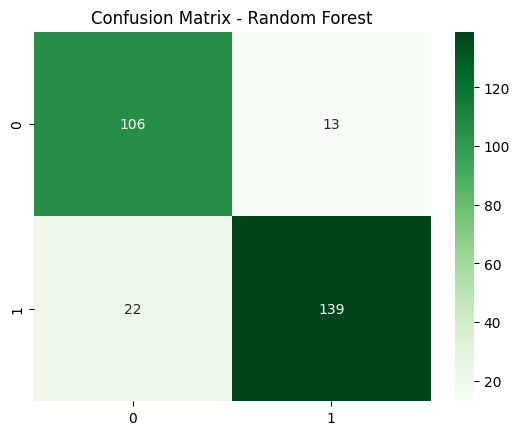

In [58]:
# Evaluate Random Forest Model
print("Random Forest Model Performance:")
print(classification_report(y_test, y_pred_rf))
print(f"Accuracy Score: {accuracy_score(y_test, y_pred_rf)}")
sns.heatmap(confusion_matrix(y_test, y_pred_rf), annot=True, fmt='d', cmap='Greens')
plt.title('Confusion Matrix - Random Forest')
plt.show()

In [59]:
# Step 8: Train and Evaluate Logistic Regression Model
log_reg_model = LogisticRegression(max_iter=1000, random_state=42)
log_reg_model.fit(X_train, y_train)

# Make Predictions on the Test Set
y_pred_lr = log_reg_model.predict(X_test)

# Evaluate the Logistic Regression Model
print("\nLogistic Regression - Accuracy:", accuracy_score(y_test, y_pred_lr))
print("Logistic Regression - Classification Report:")
print(classification_report(y_test, y_pred_lr, target_names=label_encoder.classes_))
print("Logistic Regression - Confusion Matrix:")
print(confusion_matrix(y_test, y_pred_lr))


Logistic Regression - Accuracy: 0.8464285714285714
Logistic Regression - Classification Report:
              precision    recall  f1-score   support

       Fatal       0.80      0.85      0.82       119
   Non-Fatal       0.88      0.84      0.86       161

    accuracy                           0.85       280
   macro avg       0.84      0.85      0.84       280
weighted avg       0.85      0.85      0.85       280

Logistic Regression - Confusion Matrix:
[[101  18]
 [ 25 136]]


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [60]:
# Step 9: Standardize Features for Lasso Regression
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

# Step 10: Train and Evaluate Lasso Regression for Feature Selection
lasso_model = Lasso(alpha=0.1, random_state=42)
lasso_model.fit(X_train_scaled, y_train)

# Print Feature Importances (Non-Zero Coefficients)
lasso_coefs = pd.Series(lasso_model.coef_, index=X.columns)
print("\nLasso Regression - Feature Importances (Non-Zero Coefficients):")
print(lasso_coefs[lasso_coefs != 0])



Lasso Regression - Feature Importances (Non-Zero Coefficients):
YEAR                           0.011395
ACCLASS_Non-Fatal              0.148265
ACCLOC_Intersection Related   -0.036189
IMPACTYPE_SMV Other           -0.001632
INVTYPE_Driver                -0.038842
TRAFFCTL_Traffic Signal        0.030330
dtype: float64


Step 6: Advanced Model Evaluation and Interpretation

6.1: ROC-AUC Curve and Precision-Recall Curve

In [61]:
# Align columns in X_train and X_test to ensure they have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Verify that both X_train and X_test have the same columns
print(f"Number of columns in X_train: {X_train.shape[1]}")
print(f"Number of columns in X_test: {X_test.shape[1]}")


Number of columns in X_train: 2487
Number of columns in X_test: 2487


Number of columns in X_train: 2487
Number of columns in X_test: 2487


/usr/local/lib/python3.10/dist-packages/sklearn/linear_model/_logistic.py:469: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


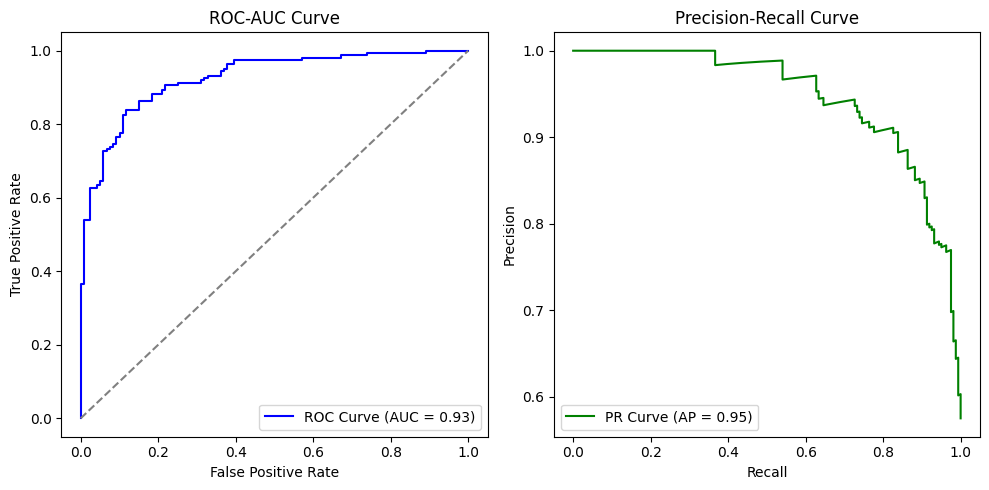

In [62]:
from sklearn.metrics import roc_curve, auc, precision_recall_curve, average_precision_score
import matplotlib.pyplot as plt

# Align columns in X_train and X_test to ensure they have the same features
X_train, X_test = X_train.align(X_test, join='left', axis=1, fill_value=0)

# Verify alignment
print(f"Number of columns in X_train: {X_train.shape[1]}")
print(f"Number of columns in X_test: {X_test.shape[1]}")

# Train a model (for example, a Logistic Regression model)
from sklearn.linear_model import LogisticRegression

# Ensure y_train and y_test are defined and correspond to the target variable
model = LogisticRegression()
model.fit(X_train, y_train)

# Make predictions and calculate probabilities
y_pred_proba = model.predict_proba(X_test)[:, 1]  # Probability for the positive class

# Calculate ROC Curve and AUC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
roc_auc = auc(fpr, tpr)

# Calculate Precision-Recall Curve
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
avg_precision = average_precision_score(y_test, y_pred_proba)

# Plot ROC-AUC Curve
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.plot(fpr, tpr, color='blue', label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC-AUC Curve')
plt.legend(loc='lower right')

# Plot Precision-Recall Curve
plt.subplot(1, 2, 2)
plt.plot(recall, precision, color='green', label=f'PR Curve (AP = {avg_precision:.2f})')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Precision-Recall Curve')
plt.legend(loc='lower left')

plt.tight_layout()
plt.show()


Step 7: Hyperparameter Tuning

Fitting 5 folds for each of 108 candidates, totalling 540 fits
Best Parameters: {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 100}
Best Score: 0.8755490311215504
Tuned Random Forest Model Performance:
              precision    recall  f1-score   support

           0       0.84      0.92      0.88       119
           1       0.93      0.88      0.90       161

    accuracy                           0.89       280
   macro avg       0.89      0.90      0.89       280
weighted avg       0.90      0.89      0.89       280



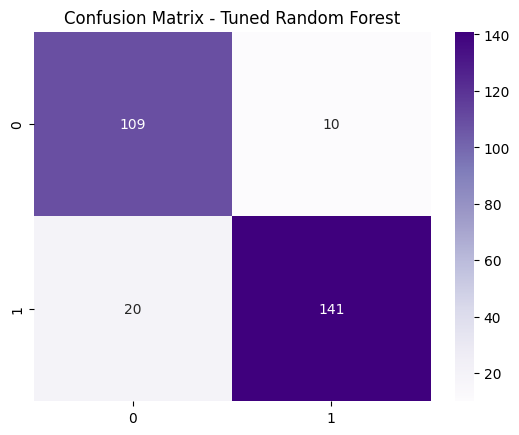

In [63]:
from sklearn.model_selection import GridSearchCV

# Step 7: Hyperparameter Tuning for Random Forest using Grid Search
param_grid = {
    'n_estimators': [50, 100, 150],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Setup GridSearch with Cross-Validation (cv=2)
grid_search = GridSearchCV(RandomForestClassifier(random_state=42), param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Print the best parameters and best score
print(f"Best Parameters: {grid_search.best_params_}")
print(f"Best Score: {grid_search.best_score_}")

# Train and Evaluate the Random Forest with Best Parameters
best_rf_model = grid_search.best_estimator_
y_pred_best_rf = best_rf_model.predict(X_test)

# Evaluate Tuned Random Forest
print("Tuned Random Forest Model Performance:")
print(classification_report(y_test, y_pred_best_rf))
sns.heatmap(confusion_matrix(y_test, y_pred_best_rf), annot=True, fmt='d', cmap='Purples')
plt.title('Confusion Matrix - Tuned Random Forest')
plt.show()


Step 8: Feature Importance Analysis

Visualize Feature Importances to Identify Risk Factors

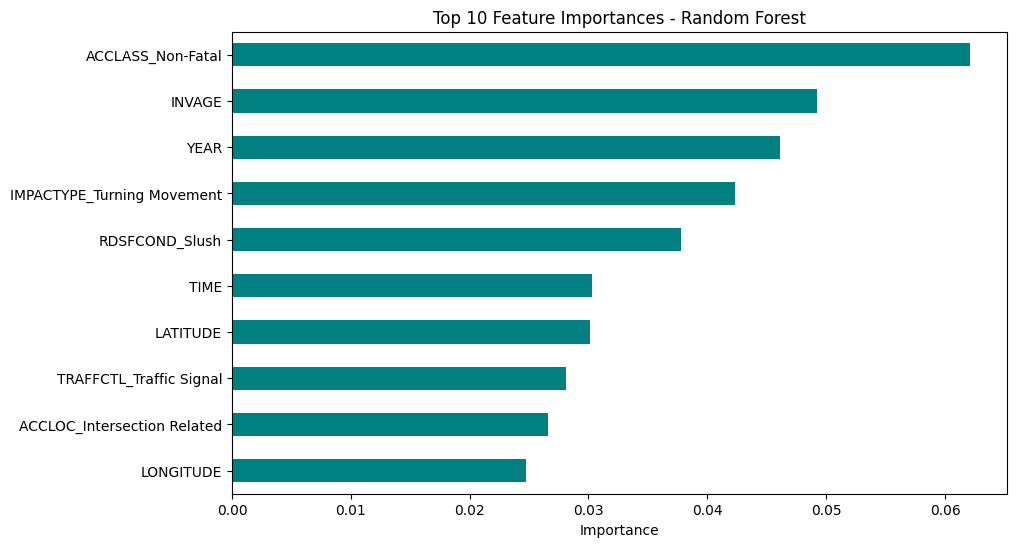

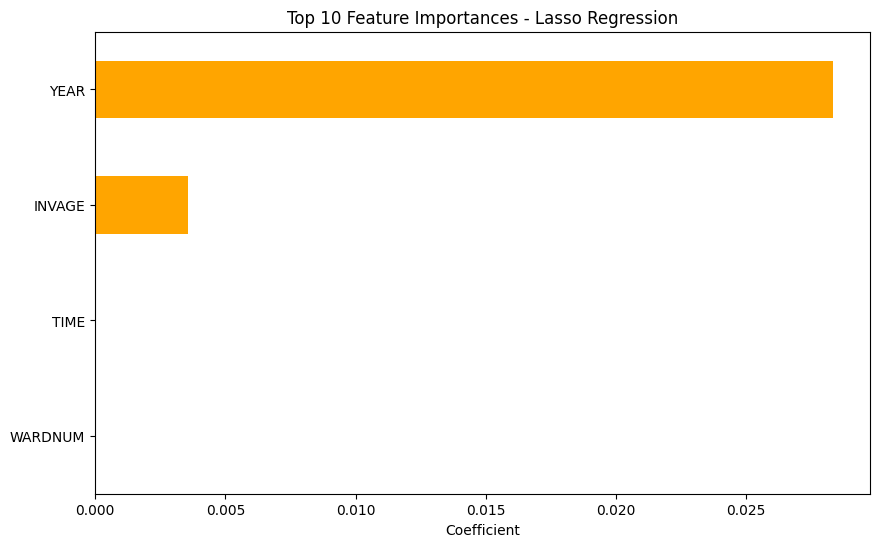

Combined Top Features from Random Forest and Lasso:
        Random Forest Importance  Lasso Coefficient
INVAGE                  0.049242           0.003556
YEAR                    0.046091           0.028341
TIME                    0.030326           0.000024


In [65]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import Lasso
import pandas as pd
import matplotlib.pyplot as plt

# Assuming X_train and y_train are already defined

# Step 2.1: Feature Importance from Random Forest
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
feature_importances_rf = pd.Series(rf_model.feature_importances_, index=X_train.columns)
top_features_rf = feature_importances_rf.nlargest(10)

plt.figure(figsize=(10, 6))
top_features_rf.plot(kind='barh', color='teal')
plt.title('Top 10 Feature Importances - Random Forest')
plt.xlabel('Importance')
plt.gca().invert_yaxis()
plt.show()

# Step 2.2: Feature Importance from Lasso
lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)
lasso_coef = pd.Series(lasso_model.coef_, index=X_train.columns)

important_features_lasso = lasso_coef[lasso_coef != 0].nlargest(10)

plt.figure(figsize=(10, 6))
important_features_lasso.plot(kind='barh', color='orange')
plt.title('Top 10 Feature Importances - Lasso Regression')
plt.xlabel('Coefficient')
plt.gca().invert_yaxis()
plt.show()

# Step 2.3: Displaying Common Important Features
combined_features = pd.concat([top_features_rf, important_features_lasso], axis=1)
combined_features.columns = ['Random Forest Importance', 'Lasso Coefficient']
print("Combined Top Features from Random Forest and Lasso:")
print(combined_features.dropna())



Summary of Results in a Unified Table

Step 9: Save the Best Model

In [66]:
import joblib

# Save the best random forest model
joblib.dump(best_rf_model, 'best_random_forest_model.pkl')

print("Best Random Forest Model saved successfully.")


Best Random Forest Model saved successfully.


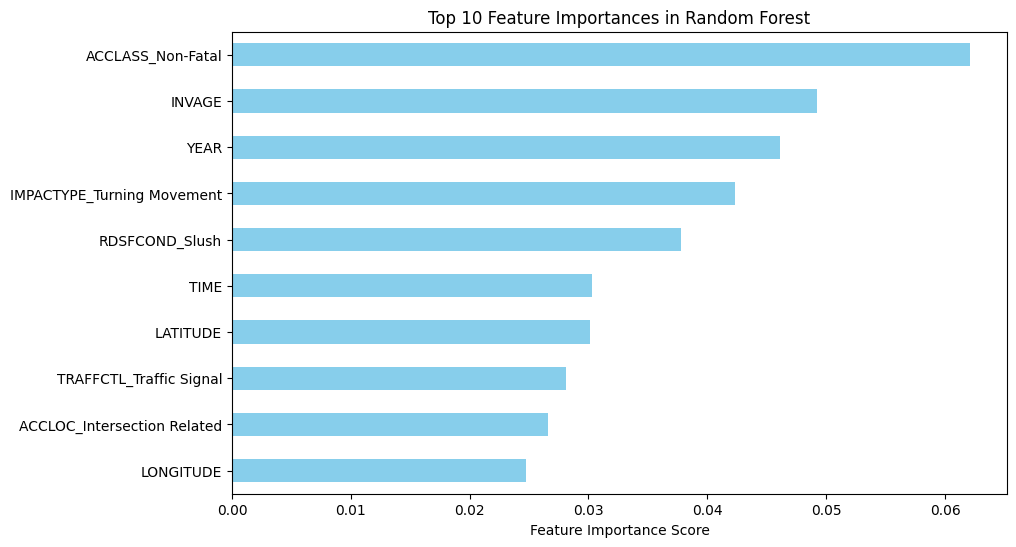

In [67]:
import pandas as pd
import matplotlib.pyplot as plt

# Extract feature importances from the Random Forest model
feature_importances = pd.Series(rf_model.feature_importances_, index=X_train.columns)

# Sort feature importances in descending order and plot
feature_importances = feature_importances.sort_values(ascending=False)
plt.figure(figsize=(10, 6))
feature_importances.head(10).plot(kind='barh', color='skyblue')
plt.title('Top 10 Feature Importances in Random Forest')
plt.xlabel('Feature Importance Score')
plt.gca().invert_yaxis()  # Invert the y-axis to show highest importance at the top
plt.show()


In [68]:
from sklearn.tree import export_text, plot_tree
import matplotlib.pyplot as plt

# Extract a single tree from the forest
single_tree = rf_model.estimators_[0]

# Option 1: Print text representation of the tree
tree_rules = export_text(single_tree, feature_names=list(X_train.columns))
print(tree_rules)




|--- ACCNUM_1364430 <= 0.50
|   |--- STREET2_ELMSTHORPE AVE <= 0.50
|   |   |--- STREET1_PARKSIDE DR <= 0.50
|   |   |   |--- WARDNUM <= 14.50
|   |   |   |   |--- INVTYPE_Driver <= 0.50
|   |   |   |   |   |--- ACCLOC_Intersection Related <= 0.50
|   |   |   |   |   |   |--- DATE_2015/09/05 04:00:00+00 <= 0.50
|   |   |   |   |   |   |   |--- STREET2_BLOOR ST W <= 0.50
|   |   |   |   |   |   |   |   |--- ACCNUM_2001898372 <= 0.50
|   |   |   |   |   |   |   |   |   |--- STREET2_CORNELIUS PKWY <= 0.50
|   |   |   |   |   |   |   |   |   |   |--- DATE_2016/09/16 04:00:00+00 <= 0.50
|   |   |   |   |   |   |   |   |   |   |   |--- truncated branch of depth 26
|   |   |   |   |   |   |   |   |   |   |--- DATE_2016/09/16 04:00:00+00 >  0.50
|   |   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |   |--- STREET2_CORNELIUS PKWY >  0.50
|   |   |   |   |   |   |   |   |   |   |--- class: 0.0
|   |   |   |   |   |   |   |   |--- ACCNUM_2001898372 >  0.50
|

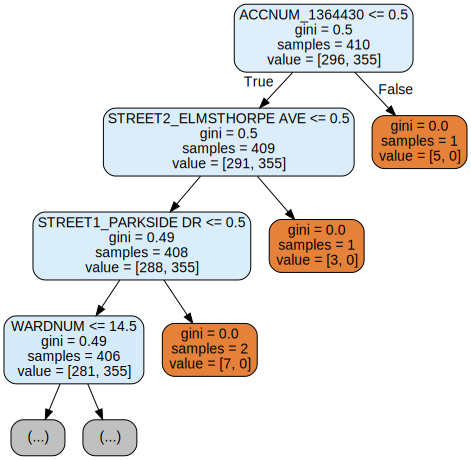

In [69]:
from sklearn.tree import export_graphviz
import graphviz

# Export the decision tree to a dot file with a limited depth for readability
export_graphviz(single_tree, out_file='tree.dot', feature_names=X_train.columns,
                max_depth=3, filled=True, rounded=True, precision=2)

# Read and visualize the tree using graphviz
with open('tree.dot') as f:
    dot_graph = f.read()

# Create graphviz visualization
graphviz.Source(dot_graph)
